In [1]:
import pandas as pd
import missingno as msno

In [9]:
df_gastro = pd.read_csv("Gastronomieumsaetze_flat_filtered.csv", delimiter=",", encoding="latin1")

<Axes: >

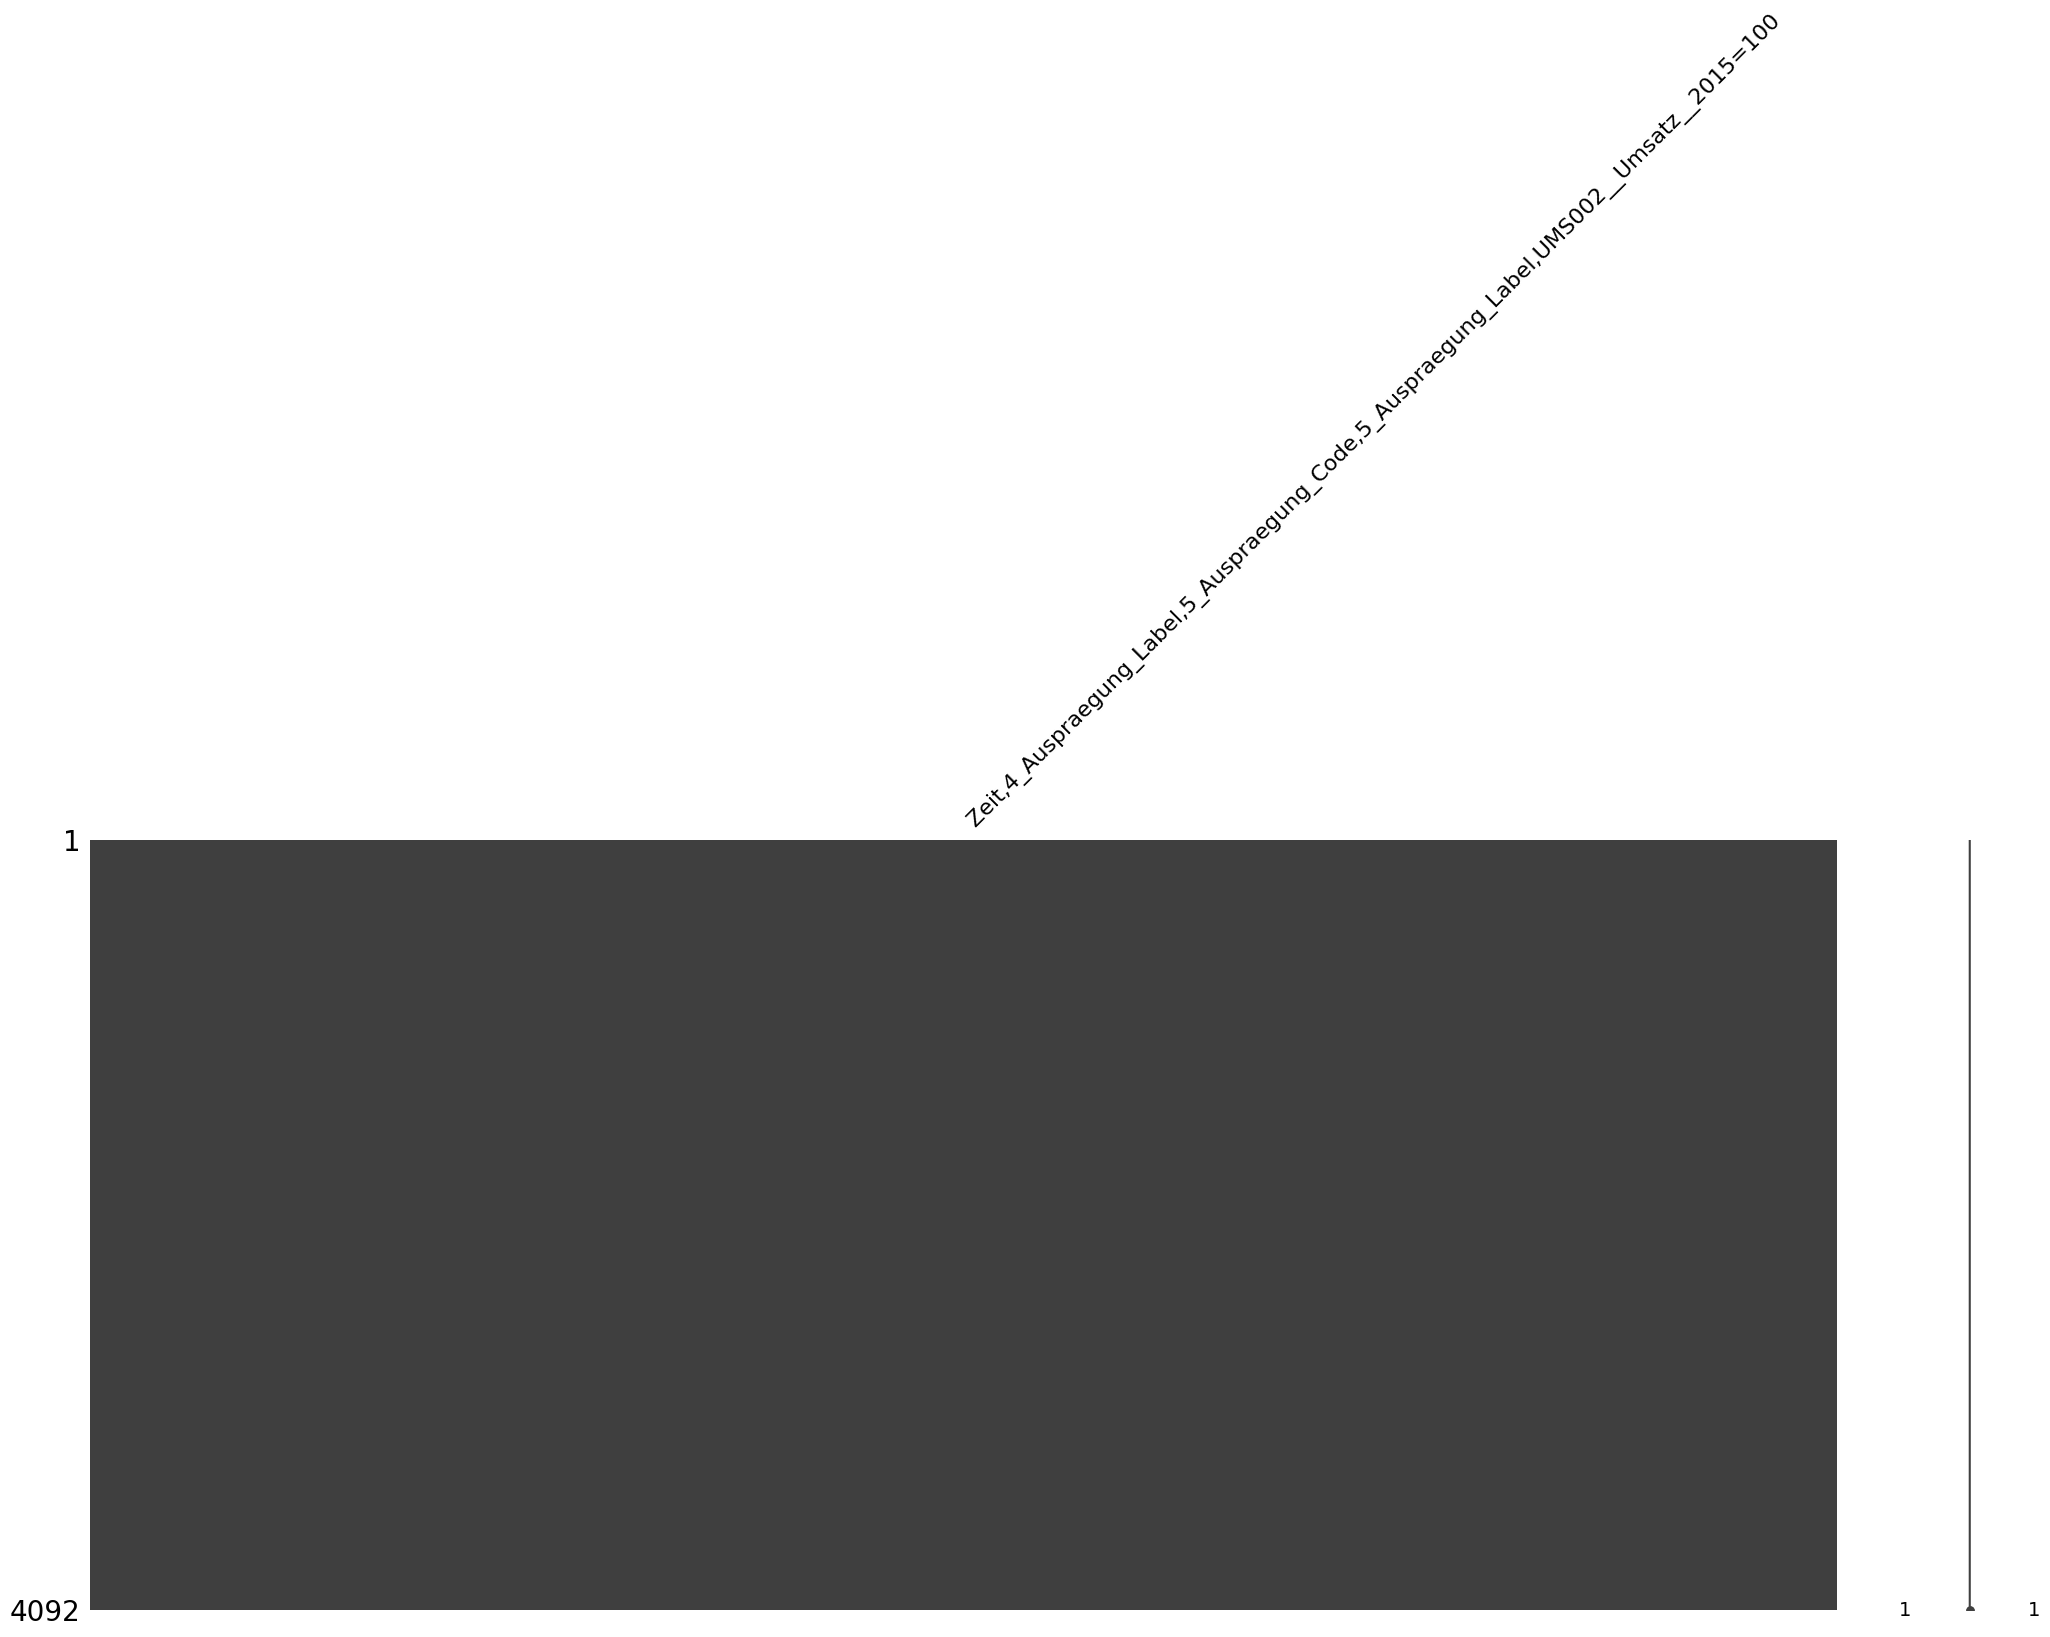

In [7]:
msno.matrix(df_gastro)

## Wetterdaten formatieren
von .txt zu .csv

In [4]:
import os

# Definiere den Ordnerpfad
ordnerpfad = './Wetterdaten'

# Durchlaufe jeden Ordner im Hauptordner
for ordnername in os.listdir(ordnerpfad):
    # Überprüfe, ob es sich um einen Ordner handelt
    if os.path.isdir(os.path.join(ordnerpfad, ordnername)):
        # Durchlaufe jede Datei im Unterordner
        unterordner_pfad = os.path.join(ordnerpfad, ordnername)
        for dateiname in os.listdir(unterordner_pfad):
            # Überprüfe, ob die Datei eine .txt-Datei ist
            if dateiname.endswith('.txt'):
                # Baue den alten und neuen Dateinamen
                alter_pfad = os.path.join(unterordner_pfad, dateiname)
                neuer_name = os.path.splitext(dateiname)[0] + '.csv'
                neuer_pfad = os.path.join(unterordner_pfad, neuer_name)
                
                # Umbenenne die Datei
                os.rename(alter_pfad, neuer_pfad)

In [10]:
df_gastro

,Zeit,4_Auspraegung_Label,5_Auspraegung_Code,5_Auspraegung_Label,UMS002__Umsatz__2015=100
0,1994,Januar,WZ08-55,Beherbergung,"92,3"
1,1994,Januar,WZ08-551,"Hotels, Gasthoefe und Pensionen","91,9"
2,1994,Januar,WZ08-552,Ferienunterkuenfte u. aehnliche Beherbergungss...,"97,3"
3,1994,Januar,WZ08-553,Campingplaetze,"68,4"
4,1994,Januar,WZ08-559,Sonstige Beherbergungsstaetten,"127,1"
...,...,...,...,...,...
4087,2024,Dezember,WZ08-561,"Restaurants, Gaststaetten, Imbissstuben, Cafes...",...
4088,2024,Dezember,WZ08-562,Caterer und sonstige Verpflegungsdienstleistungen,...
4089,2024,Dezember,WZ08-563,Ausschank von Getraenken,...
4090,2024,Dezember,WZ08-561-01,Gaststaettengewerbe,...


In [57]:
import csv
import re

def replace_umlauts(name):
    # Ersetze 'ä' mit 'ae', 'ö' mit 'oe', 'ü' mit 'ue'
    name = re.sub(r'ä', 'ae', name)
    name = re.sub(r'ö', 'oe', name)
    name = re.sub(r'ü', 'ue', name)
    return name

# Pfad zur CSV-Datei
csv_file = './Umsatzdaten/Gastronomieumsaetze_flat.csv'
# Pfad zur Ausgabedatei
output_file = 'Gastronomieumsaetze_flat_update.csv'

with open(csv_file, newline='', encoding='latin-1') as infile, \
        open(output_file, 'w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        # Durchlaufe jede Zeile und ersetze die Namen
        modified_row = [replace_umlauts(cell) for cell in row]
        # Schreibe die modifizierte Zeile in die Ausgabedatei
        writer.writerow(modified_row)

print("CSV-Datei wurde erfolgreich verarbeitet.")

CSV-Datei wurde erfolgreich verarbeitet.


In [58]:
df_gastro = pd.read_csv("Gastronomieumsaetze_flat_update.csv", delimiter=";", encoding="latin1")

In [11]:
df_gastro

,Zeit,4_Auspraegung_Label,5_Auspraegung_Code,5_Auspraegung_Label,UMS002__Umsatz__2015=100
0,1994,Januar,WZ08-55,Beherbergung,"92,3"
1,1994,Januar,WZ08-551,"Hotels, Gasthoefe und Pensionen","91,9"
2,1994,Januar,WZ08-552,Ferienunterkuenfte u. aehnliche Beherbergungss...,"97,3"
3,1994,Januar,WZ08-553,Campingplaetze,"68,4"
4,1994,Januar,WZ08-559,Sonstige Beherbergungsstaetten,"127,1"
...,...,...,...,...,...
4087,2024,Dezember,WZ08-561,"Restaurants, Gaststaetten, Imbissstuben, Cafes...",...
4088,2024,Dezember,WZ08-562,Caterer und sonstige Verpflegungsdienstleistungen,...
4089,2024,Dezember,WZ08-563,Ausschank von Getraenken,...
4090,2024,Dezember,WZ08-561-01,Gaststaettengewerbe,...


In [60]:
for column in df_gastro.columns:
    print(column)

Statistik_Code
Statistik_Label
Zeit_Code
Zeit_Label
Zeit
1_Merkmal_Code
1_Merkmal_Label
1_Auspraegung_Code
1_Auspraegung_Label
2_Merkmal_Code
2_Merkmal_Label
2_Auspraegung_Code
2_Auspraegung_Label
3_Merkmal_Code
3_Merkmal_Label
3_Auspraegung_Code
3_Auspraegung_Label
4_Merkmal_Code
4_Merkmal_Label
4_Auspraegung_Code
4_Auspraegung_Label
5_Merkmal_Code
5_Merkmal_Label
5_Auspraegung_Code
5_Auspraegung_Label
UMS002__Umsatz__2015=100


In [48]:
df_gastro["4_Auspraegung_Code"].unique()

array(['MONAT01', 'MONAT02', 'MONAT03', 'MONAT04', 'MONAT05', 'MONAT06',
       'MONAT07', 'MONAT08', 'MONAT09', 'MONAT10', 'MONAT11', 'MONAT12'],
      dtype=object)

In [64]:
# # Spalten, die gelöscht werden sollen
#columns_to_delete = ['Statistik_Code', 'Statistik_Label', "Zeit_Code", "Zeit_Label", "1_Merkmal_Code", "1_Merkmal_Label", "1_Auspraegung_Code", "1_Auspraegung_Label", "2_Merkmal_Code", "2_Merkmal_Label", "2_Auspraegung_Code", "2_Auspraegung_Label", "3_Merkmal_Code", "3_Merkmal_Label", "3_Auspraegung_Code", "3_Auspraegung_Label", "4_Auspraegung_Code", "4_Merkmal_Label", "4_Merkmal_Code", "5_Merkmal_Code", "5_Merkmal_Label"]
# columns_to_delete = ["4_Auspraegung_Code", "4_Merkmal_Label", "4_Merkmal_Code"]

# # Löschen der angegebenen Spalten
#df_gastro = df_gastro.drop(columns=columns_to_delete)

# Speichern der bereinigten Daten in einer neuen CSV-Datei
df_gastro.to_csv(output_csv, index=False)

print("Bestimmte Spalten wurden erfolgreich gelöscht und die bereinigte CSV-Datei wurde gespeichert.")


Bestimmte Spalten wurden erfolgreich gelöscht und die bereinigte CSV-Datei wurde gespeichert.


In [15]:
import csv
import re

# Umbenennen von Spalten
df_gastro = df_gastro.rename(columns={'Zeit': 'Jahr', '4_Auspraegung_Label': 'Monat', "5_Auspraegung_Code": "Unternehmen_Id", "5_Auspraegung_Label": "Unternehmensbeschreibung"})

# Speichern der aktualisierten Daten in einer neuen CSV-Datei
df_gastro.to_csv("Gastronomieumsaetze_flat_filtered.csv", index=False)

print("Die Spalten wurden erfolgreich umbenannt und die aktualisierte CSV-Datei wurde gespeichert.")


Die Spalten wurden erfolgreich umbenannt und die aktualisierte CSV-Datei wurde gespeichert.
